In [1]:
# Import packages for ‘CAPM output for Apple stock’ example:
import statsmodels.api as sm 
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
# [1] Install Pandas ‘DataReader’. 
!pip install pandas-datareader 

# [2] Import data from the web from ‘pandas_datareader’. 
from pandas_datareader import data as web 

     |████████████████████████████████| 109 kB 4.9 MB/s eta 0:00:01


In [3]:
# [1] Set the start date.
start = datetime.datetime(2021,1,1)

# [2] Set the end date.  
end = datetime.datetime(2022,1,1)  

In [4]:
# Use the Pandas Datareader to pull data from the web;
# specify the 'ticket' and the website, as well as the start and end dates:
df_spy = web.DataReader('SPY','yahoo',start,end)   

df_spy.head()

High         Low        Open       Close       Volume  \
Date                                                                      
2021-01-04  375.450012  364.820007  375.309998  368.790009  110210800.0   
2021-01-05  372.500000  368.049988  368.100006  371.329987   66426200.0   
2021-01-06  376.980011  369.119995  369.709991  373.549988  107997700.0   
2021-01-07  379.899994  375.910004  376.100006  379.100006   68766800.0   
2021-01-08  381.489990  377.100006  380.589996  381.260010   71677200.0   

             Adj Close  
Date                    
2021-01-04  362.811646  
2021-01-05  365.310486  
2021-01-06  367.494446  
2021-01-07  372.954529  
2021-01-08  375.079498

In [5]:
# Pull Apple’s stock index.
df_apple = web.DataReader('AAPL','yahoo',start,end)   

# Print the results.
df_apple.head()  

High         Low        Open       Close       Volume  \
Date                                                                      
2021-01-04  133.610001  126.760002  133.520004  129.410004  143301900.0   
2021-01-05  131.740005  128.429993  128.889999  131.009995   97664900.0   
2021-01-06  131.050003  126.379997  127.720001  126.599998  155088000.0   
2021-01-07  131.630005  127.860001  128.360001  130.919998  109578200.0   
2021-01-08  132.630005  130.229996  132.429993  132.050003  105158200.0   

             Adj Close  
Date                    
2021-01-04  128.264984  
2021-01-05  129.850830  
2021-01-06  125.479843  
2021-01-07  129.761627  
2021-01-08  130.881638

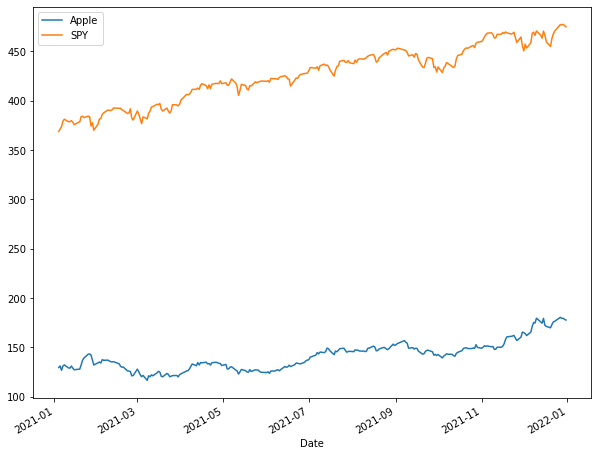

In [6]:
# Closing stock price line plot for ‘Apple’:
df_apple['Close'].plot(label = 'Apple', figsize=(10,8))

# Closing stock price line plot for ‘SPY’:
df_spy['Close'].plot(label = 'SPY')
plt.legend()

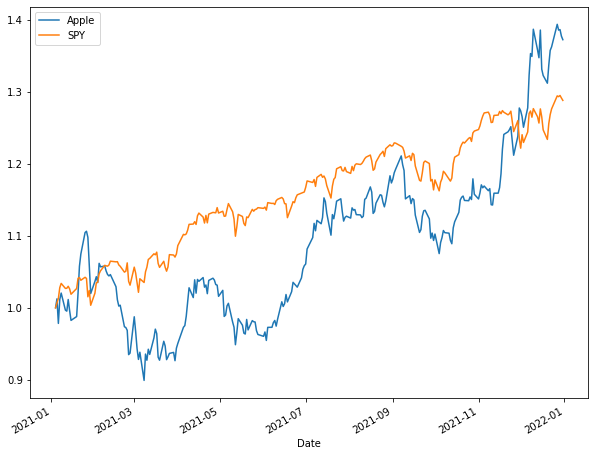

In [8]:
# [1a] Calculate the cumulative sum of closing prices for ‘Apple’ stocks; 
# stores sum in a new column named 'Cumu’:
df_apple['Cumu'] = df_apple['Close']/df_apple['Close'].iloc[0]

# [1b] Calculate the cumulative sum of closing prices for ‘SPY’ stocks; 
# stores sum in a new column named 'Cumu’:
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0] #TBA

# [2] Plot line graphs for the calculated ‘Cumu’ columns for 
# both ‘Apple’ and ‘SPY’ stocks:
df_apple['Cumu'].plot(label = 'Apple', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

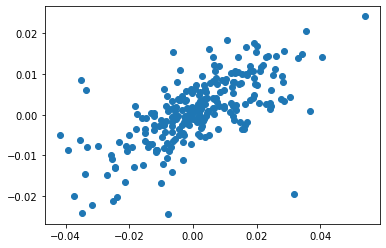

In [9]:
# [1] Calculate daily returns and 
# [2] percentage change using ‘pandas pct_change()’:
df_apple['daily_ret'] = df_apple['Close'].pct_change(1) 
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# [3] Plot the daily returns on a scatterplot:
plt.scatter(df_apple['daily_ret'],df_spy['daily_ret'])

In [10]:
# [1] Join the DataFrames.
daily_prices = pd.concat([df_apple['Close'], df_spy['Close']], axis=1)  
# [2] Set column labels.
daily_prices.columns = ['Apple', 'SPY']  

# [3] Print the new table.
print(daily_prices.head())  

                 Apple         SPY
Date                              
2021-01-04  129.410004  368.790009
2021-01-05  131.009995  371.329987
2021-01-06  126.599998  373.549988
2021-01-07  130.919998  379.100006
2021-01-08  132.050003  381.260010


In [11]:
# Get the percentage change. 
daily_returns = daily_prices.pct_change(1)  
# Print the percentage change.
print(daily_returns.head()) 

               Apple       SPY
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.012364  0.006887
2021-01-06 -0.033662  0.005979
2021-01-07  0.034123  0.014857
2021-01-08  0.008631  0.005698


In [12]:
# Get the percentage change.
daily_returns = daily_prices.pct_change(1)  
# Remove the first row.
clean_daily_returns = daily_returns.dropna(axis=0)
# Print the new DataFrame.  
print(clean_daily_returns.head()) 

               Apple       SPY
Date                          
2021-01-05  0.012364  0.006887
2021-01-06 -0.033662  0.005979
2021-01-07  0.034123  0.014857
2021-01-08  0.008631  0.005698
2021-01-11 -0.023249 -0.006741


In [21]:
from statsmodels.formula.api import ols

y = clean_daily_returns['SPY']
x = clean_daily_returns['Apple']

f = 'y ~ x'

test = ols(f, data = clean_daily_returns).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     213.8
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.27e-35
Time:                        11:17:36   Log-Likelihood:                 927.22
No. Observations:                 251   AIC:                            -1850.
Df Residuals:                     249   BIC:                            -1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.440      0.151      -0.000       0.001
x              0.3545      0.024     14.621      0.000       0.307       0.402
==============================================================================
Omnibus:                       35.524   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.676
Skew:                          -0.518   Prob(JB):                     8.45e-28
Kurtosis:                       6.294   Cond. No.                         63.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r-squared: 46.2% of the dependents variables variation is explained by th eindependent variable.

t-value = 1.440

p-value = 2.27

beta-value = 0.35 or 3.5%



In [22]:
# Reshape ‘SPY’ data to 2D.
X = clean_daily_returns['Apple'].values.reshape(-1, 1)  
# Reshape ‘Apple’ data to 2D.
y = clean_daily_returns['SPY'].values.reshape(-1, 1)  

In [23]:
# Run the linear regression test.
lr = LinearRegression()  
# Fit the model.
lr.fit(X, y) 


LinearRegression()

In [24]:
# Check/Call the coefficient (beta value).
lr.coef_  

array([[0.35448888]])

In [26]:
# Check/call the intercept (c).
lr.intercept_  

array([0.00055123])

In [25]:
# Set the the x coefficient the constant (intercept)
y_pred = lr.coef_ * X + lr.intercept_

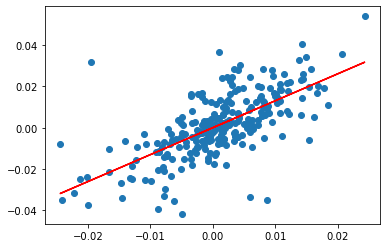

In [20]:
# [1] Draw the scatterplot using Matplotlib. 
plt.scatter(X,y) 
 # [2] Plot X and predicted y as a line;[2a] Set the line colour to red.
plt.plot(X, y_pred, color='red') 
